<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_Ciencia_de_Dados/blob/main/IMT_Sentiment_Analysis_TFIDF_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **CASE**: Avaliação de aplicativos de comida do Google Play

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Scraping

In [ ]:
# Google play scraper: https://github.com/JoMingyu/google-play-scraper
!pip install google_play_scraper

## Select apps_ids

Vamos selecionar apps nacionais de comida.

In [ ]:
apps_ids = ['br.com.brainweb.ifood',
            'com.mcdo.mcdonalds',
            'habibs.alphacode.com.br',
            'com.ubercab.eats',
            'burgerking.com.br.appandroid',
            'com.grability.rappi',
            'com.xiaojukeji.didi.brazil.customer',
            'com.vanuatu.aiqfome',
            ]


## Get app info (app_id)

In [ ]:
from tqdm import tqdm
from google_play_scraper import Sort, reviews, app

app_infos = []

for ap in tqdm(apps_ids):
    info = app(ap, lang='en', country='us')
    del info['comments']
    app_infos.append(info)

app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head()

100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,videoImage,contentRating,contentRatingDescription,adSupported,containsAds,released,updated,version,appId,url
0,iFood comida e mercado em casa,"Buy in markets, restaurants, pharmacies and pe...","Buy in markets, restaurants, pharmacies and pe...","Order food delivery, market, drinks, pharmacy ...","100,000,000+",100000000,106963054,4.639570,12659808,2615,...,None,Everyone,None,False,False,"Apr 25, 2012",1696879289,None,br.com.brainweb.ifood,https://play.google.com/store/apps/details?id=...
1,McDonald's Offers and Delivery,Enter the new McDonald's App and get exclusive...,Enter the new McDonald&#39;s App and get exclu...,"Enjoy esclusive discounts, promotions and coup...","50,000,000+",50000000,68969742,4.579838,1285862,3200,...,None,Everyone,None,True,True,"Mar 27, 2017",1696842000,3.34.0,com.mcdo.mcdonalds,https://play.google.com/store/apps/details?id=...
2,Habib's,Our menu is filled with Arab delicacies prepar...,Our menu is filled with Arab delicacies prepar...,Want to end your hunger? Come to the Habib's App!,"5,000,000+",5000000,8411175,3.852941,254015,18,...,None,Everyone,None,False,False,None,1696336521,3.10.8,habibs.alphacode.com.br,https://play.google.com/store/apps/details?id=...
3,Uber Eats: Food Delivery,Get food delivery to your doorstep from thousa...,Get food delivery to your doorstep from thousa...,"Food & Grocery Delivery App. Order Pizza, Sush...","100,000,000+",100000000,223739025,4.375628,5242366,312838,...,None,Everyone,None,True,True,"Feb 29, 2016",1697478920,None,com.ubercab.eats,https://play.google.com/store/apps/details?id=...
4,Burger King Brasil,Do you already know the BK® rewards program? C...,Do you already know the BK® rewards program? C...,Get exclusive coupons with the official applic...,"10,000,000+",10000000,22948154,4.555555,400274,6,...,None,Everyone,None,False,False,None,1697057297,4.0.11,burgerking.com.br.appandroid,https://play.google.com/store/apps/details?id=...


## Scraping App Reviews



In [ ]:
app_reviews = []

for ap in tqdm(apps_ids):
    for score in list(range(1, 6)):
        for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
            rvs, _ = reviews(
                ap,
                lang='pt',
                country='br',
                sort=sort_order,
            )
            for r in rvs:
                r['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
                r['appId'] = ap
            app_reviews.extend(rvs)

100%|██████████| 8/8 [00:17<00:00,  2.22s/it]


## Saving reviews in a DataFrame

In [ ]:
app_reviews_df = pd.DataFrame(app_reviews)

In [ ]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,5bb50b12-d3c0-4410-a7c7-d58931eecefc,Reinaldo Castro,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso bastante pra fazer mercado, mas, nas últim...",2,213,9.227.0,2023-10-10 21:03:49,None,NaT,9.227.0,most_relevant,br.com.brainweb.ifood
1,23438b56-fc66-49a5-bab8-b340b2ba20ac,Karina F S (Akarinaluz),https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz uma compra que tinha desconto e não entrou...,1,487,9.226.0,2023-10-01 10:53:46,None,NaT,9.226.0,most_relevant,br.com.brainweb.ifood
2,04326939-0402-4fba-8fa9-c804c6990638,Luiz Felipe Tavares Cancian,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplicativo não funciona mais, os pedidos são f...",1,237,9.226.0,2023-09-29 23:06:49,None,NaT,9.226.0,most_relevant,br.com.brainweb.ifood
3,eb08efe5-184d-46aa-b9a1-21b0315961a1,Rodrigo Jordão,https://play-lh.googleusercontent.com/a-/ALV-U...,"Quando o carrinho de mercado está muito cheio,...",1,423,9.228.0,2023-10-14 21:18:28,None,NaT,9.228.0,most_relevant,br.com.brainweb.ifood
4,34a866ed-31db-4329-bbbb-3e9d3d806447,César de Lucca,https://play-lh.googleusercontent.com/a-/ALV-U...,O app é muito bom! O problema é o atendimento....,5,53,9.226.0,2023-09-30 03:13:12,None,NaT,9.226.0,most_relevant,br.com.brainweb.ifood


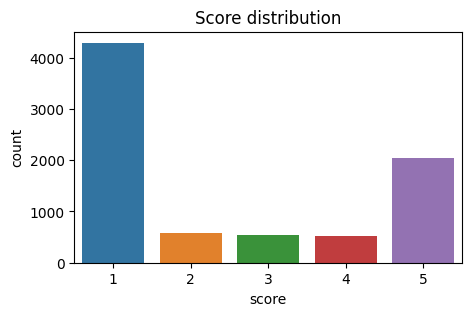

In [ ]:
plt.figure(figsize=(5,3))

sns.countplot(x='score',data=app_reviews_df)
plt.title('Score distribution')
plt.show()

#### Q1. Quantos reviews foram coletados de cada appId?

In [ ]:
app_reviews_df.appId.value_counts()

br.com.brainweb.ifood                  1000
com.mcdo.mcdonalds                     1000
habibs.alphacode.com.br                1000
com.ubercab.eats                       1000
burgerking.com.br.appandroid           1000
com.grability.rappi                    1000
com.xiaojukeji.didi.brazil.customer    1000
com.vanuatu.aiqfome                    1000
Name: appId, dtype: int64

In [ ]:
app_reviews_df.to_csv('app_reviews_df.csv',index=None)

# **Importante: WITHOUT SCRAPING**

As informações que você coletou mudam a toda hora... afinal, aparecem novas revisões a cada dia. Então vamos empregar um dataset comum a todos.

In [ ]:
df = pd.read_csv("https://github.com/Rogerio-mack/IMT_Ciencia_de_Dados/raw/main/data/app_reviews_df.csv")
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,5bb50b12-d3c0-4410-a7c7-d58931eecefc,Reinaldo Castro,https://play-lh.googleusercontent.com/a-/ALV-U...,"Uso bastante pra fazer mercado, mas, nas últim...",2,213,9.227.0,2023-10-10 21:03:49,NaN,NaN,9.227.0,most_relevant,br.com.brainweb.ifood
1,23438b56-fc66-49a5-bab8-b340b2ba20ac,Karina F S (Akarinaluz),https://play-lh.googleusercontent.com/a-/ALV-U...,Fiz uma compra que tinha desconto e não entrou...,1,487,9.226.0,2023-10-01 10:53:46,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood
2,04326939-0402-4fba-8fa9-c804c6990638,Luiz Felipe Tavares Cancian,https://play-lh.googleusercontent.com/a-/ALV-U...,"Aplicativo não funciona mais, os pedidos são f...",1,237,9.226.0,2023-09-29 23:06:49,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood
3,eb08efe5-184d-46aa-b9a1-21b0315961a1,Rodrigo Jordão,https://play-lh.googleusercontent.com/a-/ALV-U...,"Quando o carrinho de mercado está muito cheio,...",1,423,9.228.0,2023-10-14 21:18:28,NaN,NaN,9.228.0,most_relevant,br.com.brainweb.ifood
4,34a866ed-31db-4329-bbbb-3e9d3d806447,César de Lucca,https://play-lh.googleusercontent.com/a-/ALV-U...,O app é muito bom! O problema é o atendimento....,5,53,9.226.0,2023-09-30 03:13:12,NaN,NaN,9.226.0,most_relevant,br.com.brainweb.ifood


In [ ]:
df.shape

(8000, 13)

#### Q2. Quais scores estão mais presentes na base de dados?

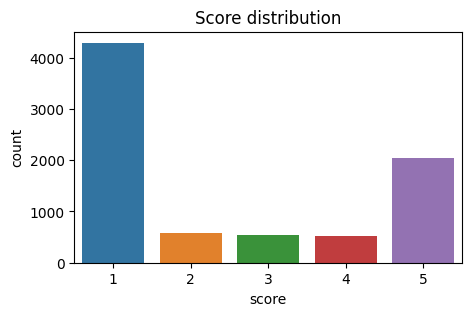

In [ ]:
plt.figure(figsize=(5,3))

sns.countplot(x='score',data=app_reviews_df)
plt.title('Score distribution')
plt.show()

## Sentiment from score

Crie uma atributo `sentiment` em `df` atribuindo os seguintes sentimentos a cada review:

<br>

$-1$, negativo se `score` $\le 2$,

$0$, neutro se `score` $= 3$,

$+1$, positivo se `score` $\gt 3$

In [ ]:
df['sentiment'] = df.score.replace([1,2,3,4,5],[-1,-1,0,1,1])

## Load `nltk`

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#### Q3. Acesse a lista de `stopwords` em português (`stopwords.words('portuguese')`). Qual a posição da `stopword` "não"?

In [ ]:
stopwords.words('portuguese')[0:10]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [ ]:
len( stopwords.words('portuguese') )

207

In [ ]:
 stopwords.words('portuguese').index('não')

120

## Use a seguinte função de pré-processamento de textos

In [ ]:
def text_preprocessing(s):
    # Always lower
    s = s.lower()
    # Remove @name
    s = re.sub(r'(@.*?)[\s]', ' ', s)
    # Isolate and remove punctuations except '?'
    s = re.sub(r'([\'\"\.\!\?\\/\,])', r' \1 ', s)
    s = re.sub(r'[^\w\s\?]', ' ', s)
    # Remove some special characters
    s = re.sub(r'([\;\:\|•«\n])', ' ', s)
    # Remove trailing whitespace
    s = re.sub(r'\s+', ' ', s).strip()
    # Remove stopwords except 'não' e 'nem'
    s = " ".join([word for word in s.split()
                  if word not in stopwords.words('portuguese')
                  or word in ['não','nem']])

    return s


Crie uma lista `X_preprocessed` em que cada elemento é texto de revisão (`df.content`) pré-processado pela função acima.

<small>
nota: talvez pudéssemos empregar o preprocessor na função de tokenização, ou mesmo o stop_words da função, mas aqui vamos por partes...

In [ ]:
X_preprocessed = np.array([text_preprocessing(text) for text in df.content])

In [ ]:
#@markdown Check if True
X_preprocessed[7000][0:100] == 'última atualização fica apresentando erro conexão parece internet caiu sendo verifiquei tá tudo ok a'

True

## TF-IDF

Empregue o estimador de TF-IDF de textos do `scikit-learn` com os seguintes parâmetros,

```
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False,
                         ...
```

e o máximo tamanho de representação dos texto com 4096, para criar representações TF-IDF dos textos pré-processados de `X_preprocessed`.

**Lembre-se**, um estimador possui métodos `fit()` e `transform()`...







In [ ]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate TF-IDF
tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False,
                         max_features=4096)

X_tfidf = tf_idf.fit_transform(X_preprocessed)


CPU times: user 458 ms, sys: 8.12 ms, total: 466 ms
Wall time: 495 ms


In [ ]:
X_tfidf

<8000x4096 sparse matrix of type '<class 'numpy.float64'>'
	with 179985 stored elements in Compressed Sparse Row format>

In [ ]:
X_tfidf.toarray().shape

(8000, 4096)

In [ ]:
X_tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_tfidf.toarray()[ X_tfidf.toarray() != 0 ]

array([0.19757539, 0.12594436, 0.06847243, ..., 0.49119569, 0.60585667,
       0.62583104])

In [ ]:
#@markdown Check if True
X_tfidf.toarray()[ X_tfidf.toarray() != 0 ].sum() == 32607.820314182558

True

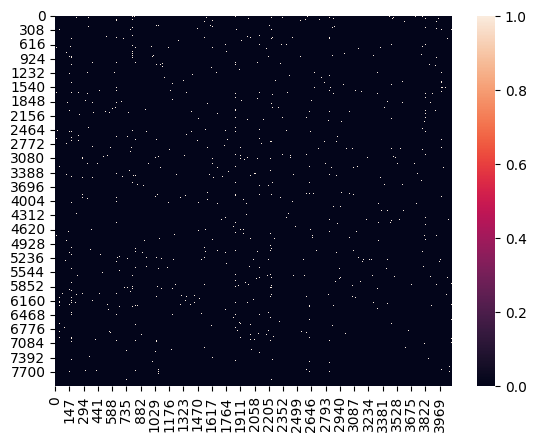

In [ ]:
X0 = X_tfidf.toarray() != 0
sns.heatmap(X0)
plt.show()

## KNeighborsClassifier

Empregue os valores TF-IDF obtidos dos textos de review acima, `X_tfidf`, para fazer uma classificação do sentimento das revisões. **Empregue o modelo de K-vizinhos mais próximos, com `k=8` e função distância cosseno.**

Empregue `random_state=1`, 0.3 de dados de teste estratificados.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

y = df.sentiment

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, stratify=y, test_size=0.3, random_state=1)

clf = KNeighborsClassifier(n_neighbors=8,metric='cosine')

clf.fit(X_train,y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.86      0.91      0.89      1465
           0       0.52      0.27      0.35       164
           1       0.82      0.83      0.82       771

    accuracy                           0.84      2400
   macro avg       0.74      0.67      0.69      2400
weighted avg       0.83      0.84      0.83      2400



#### Q4. Qual a acuracidade obtida do modelo de K-vizinhos mais próximos?







#### Q5. Classifique quanto ao sentimento as expressões 'Aplicativo Lixo' e 'Maravilha!'. Ambas deram o resultado esperado?

In [ ]:
my_test = tf_idf.transform(['Aplicativo Lixo'])
clf.predict(my_test)

array([-1])

In [ ]:
my_test = tf_idf.transform(['Maravilha!'])
clf.predict(my_test)

array([-1])

## RandomForestClassifier

Altere o código do modelo anterior para empregar uma Floresta de Árvores Aleatórias não esquecendo de empregar `random_state=1`.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

y = df.sentiment

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, stratify=y, test_size=0.3, random_state=1)

clf = RandomForestClassifier(random_state=1)

clf.fit(X_train,y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      1465
           0       0.98      0.96      0.97       164
           1       0.98      0.99      0.98       771

    accuracy                           0.98      2400
   macro avg       0.98      0.98      0.98      2400
weighted avg       0.99      0.98      0.98      2400



#### Q6. Qual a acuracidade obtida do modelo de Floresta?







#### Q7. Classifique quanto ao sentimento as expressões 'Aplicativo Lixo' e 'Maravilha!' com o novo modelo. Ambas deram o resultado esperado?

In [ ]:
my_test = tf_idf.transform(['Aplicativo Lixo'])
clf.predict(my_test)

array([-1])

In [ ]:
my_test = tf_idf.transform(['Maravilha!'])
clf.predict(my_test)

array([1])

## RandomForestClassifier

Altere o código do modelo Floresta de Árvores Aleatórias anterior agora para classificar o score dos reviews.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

y = df.score

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, stratify=y, test_size=0.3, random_state=1)

clf = RandomForestClassifier(random_state=1)

clf.fit(X_train,y_train)

print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1288
           2       1.00      0.95      0.97       177
           3       0.99      0.95      0.97       164
           4       1.00      0.89      0.94       156
           5       0.95      1.00      0.98       615

    accuracy                           0.98      2400
   macro avg       0.99      0.96      0.97      2400
weighted avg       0.98      0.98      0.98      2400



#### Q8. Qual a acuracidade obtida na classificação do score dos reviews?